# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
#read the csv file
df=pd.read_csv("flipkart_com-ecommerce_sample.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [4]:
df.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [5]:
df.shape

(20000, 15)

In [6]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


# Cleaning and Preprocessing

**Heat Map**

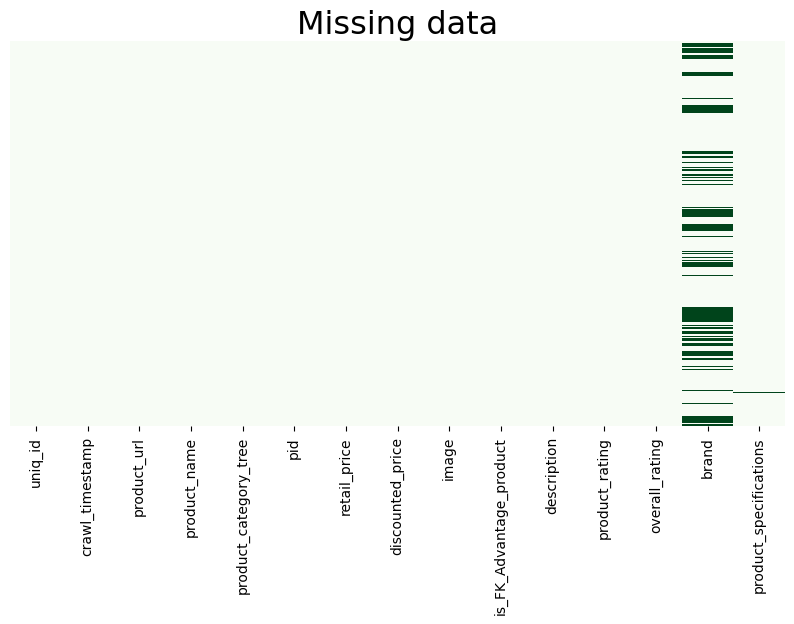

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),
            cmap="Greens",
            yticklabels=False,
            cbar=False)
plt.title("Missing data",fontsize=23)
plt.xticks(fontsize=10)
plt.show()

In [8]:
df.duplicated().value_counts()

False    20000
Name: count, dtype: int64

In [9]:
#checking the datatype
df.dtypes

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object

In [10]:
df['crawl_timestamp']=pd.to_datetime(df['crawl_timestamp']) #converting object datatype to datetime datatype

In [11]:
df['crawl_year']= df['crawl_timestamp'].apply(lambda x:x.year)
df['crawl_month']=df['crawl_timestamp'].apply(lambda x:x.month)

In [12]:
print(df.product_category_tree[2])
print("\n")
for i in df.product_category_tree[2].split(">>"):
    print(i)

["Footwear >> Women's Footwear >> Ballerinas >> AW Bellies"]


["Footwear 
 Women's Footwear 
 Ballerinas 
 AW Bellies"]


In [13]:
df['MainCategory']=df['product_category_tree'].apply(lambda x:x.split('>>')[0][2:])

In [14]:
df['MainCategory']

0            Clothing 
1           Furniture 
2            Footwear 
3            Clothing 
4        Pet Supplies 
             ...      
19995       Baby Care 
19996       Baby Care 
19997       Baby Care 
19998       Baby Care 
19999       Baby Care 
Name: MainCategory, Length: 20000, dtype: object

In [15]:
def secondary(x):
    try:
        return x.split('>>')[1][1:]
    except IndexError:
        return 'None'
def tertiary(x):
    try:
        return x.split('>>')[2][1:]
    except IndexError:
        return 'None'
def quaterrary(x):
    try:
        return x.split(">>")[3][1:]
    except IndexError:
        return 'None'
    
        

In [16]:
df['secondarycategory']=df['product_category_tree'].apply(secondary)
df['tertiarycategory']=df['product_category_tree'].apply(tertiary)
df['quaterrarycategory']=df['product_category_tree'].apply(quaterrary)

In [17]:
df.shape

(20000, 21)

In [18]:
df.head() #checking new columns are added or not

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,product_rating,overall_rating,brand,product_specifications,crawl_year,crawl_month,MainCategory,secondarycategory,tertiarycategory,quaterrarycategory
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",2016,3,Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",2016,3,Footwear,Women's Footwear,Ballerinas,"AW Bellies""]"
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23+00:00,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",2016,3,Pet Supplies,Grooming,Skin & Coat Care,Shampoo


# **Sales**

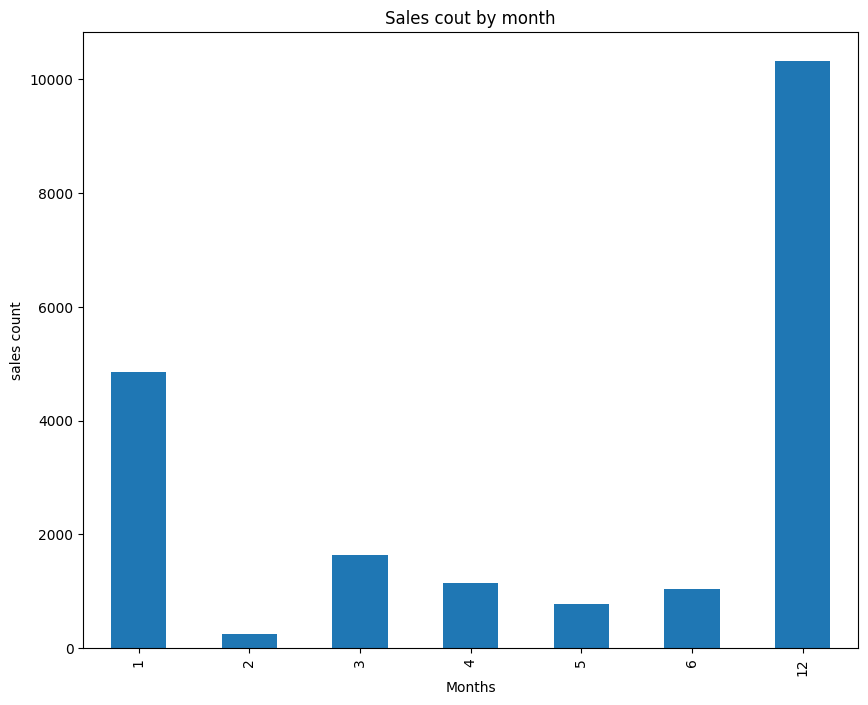

In [19]:
plt.figure(figsize=(10,8))
df.groupby('crawl_month')['crawl_month'].count().plot(kind='bar')
plt.title("Sales cout by month")
plt.ylabel("sales count")
plt.xlabel("Months")
plt.show()

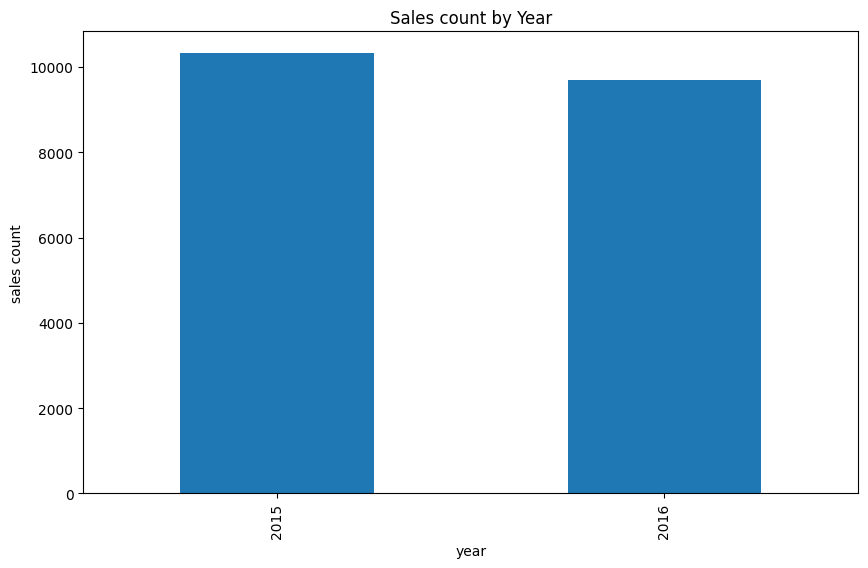

In [20]:
plt.figure(figsize=(10,6))
df.groupby('crawl_year')['crawl_year'].count().plot(kind="bar")
plt.xlabel("year")
plt.ylabel("sales count")
plt.title("Sales count by Year")
plt.show()

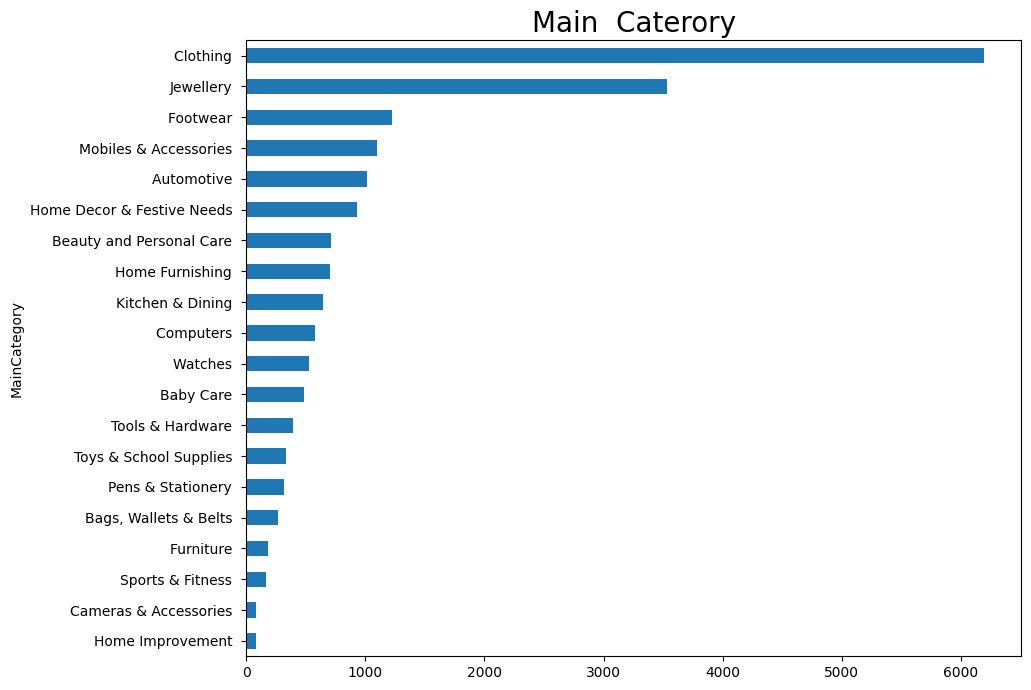

In [21]:
plt.figure(figsize=(10,8))
df['MainCategory'].value_counts()[:20].sort_values(ascending=True).plot(kind="barh")
plt.title("Main  Caterory",fontsize=20)
plt.show()

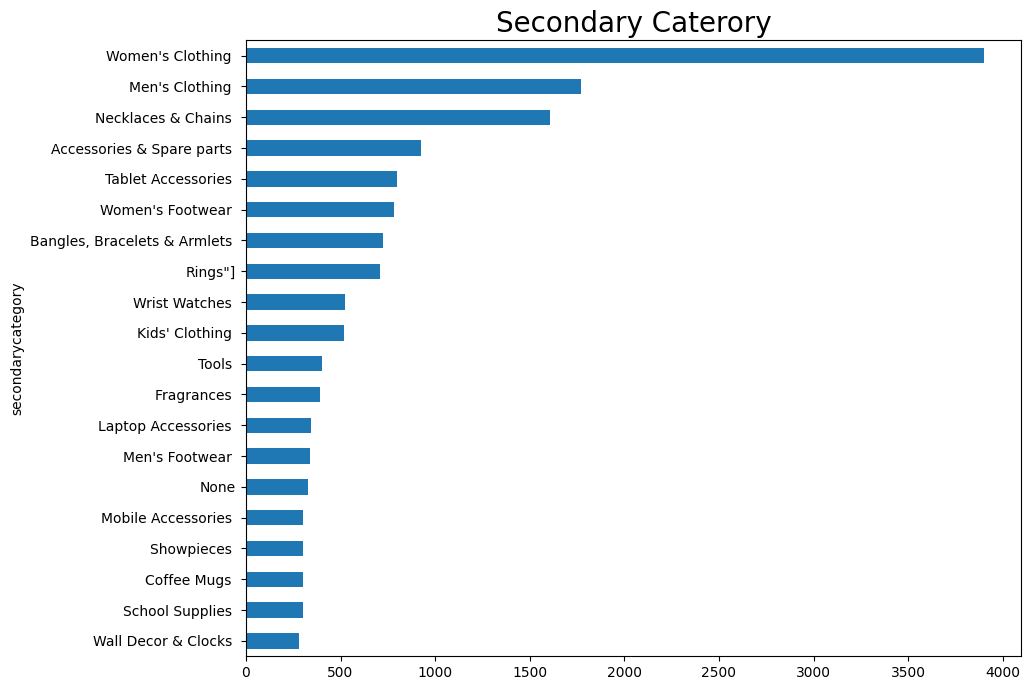

In [22]:
plt.figure(figsize=(10,8))
df['secondarycategory'].value_counts()[:20].sort_values(ascending=True).plot(kind="barh")
plt.title("Secondary Caterory",fontsize=20)
plt.show()

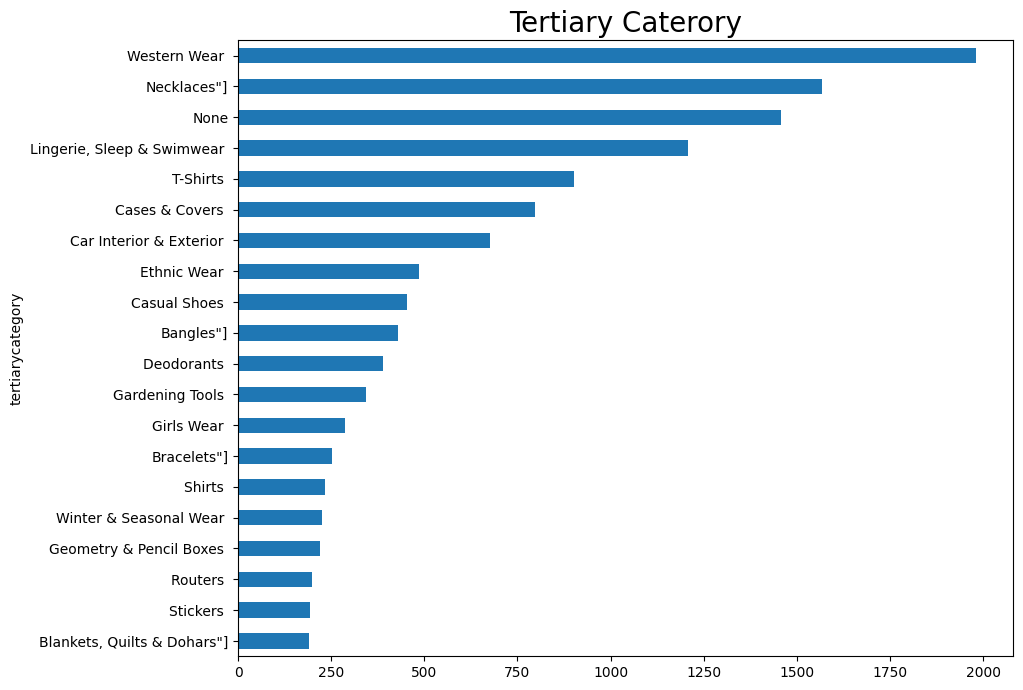

In [23]:
plt.figure(figsize=(10,8))
df['tertiarycategory'].value_counts()[:20].sort_values(ascending=True).plot(kind="barh")
plt.title("Tertiary Caterory",fontsize=20)
plt.show()

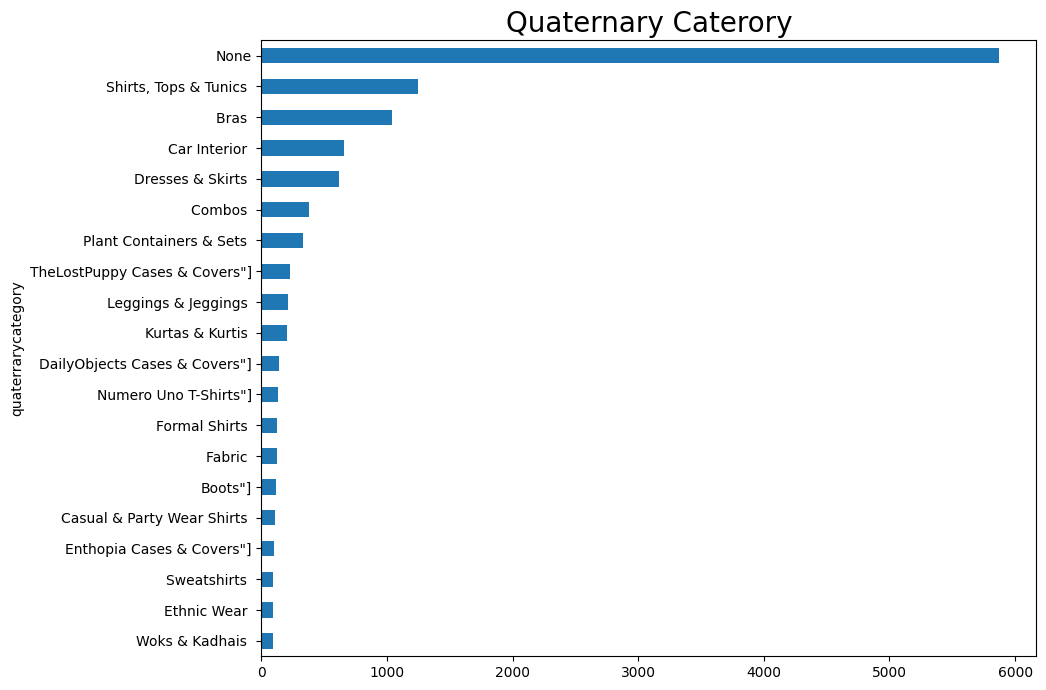

In [24]:
plt.figure(figsize=(10,8))
df['quaterrarycategory'].value_counts()[:20].sort_values(ascending=True).plot(kind="barh")
plt.title("Quaternary Caterory",fontsize=20)
plt.show()

**Most expensive item in flipkart during this time??**

In [25]:
df['retail_price'].max()

np.float64(571230.0)

In [26]:
df[df['retail_price']==571230.0]

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,product_rating,overall_rating,brand,product_specifications,crawl_year,crawl_month,MainCategory,secondarycategory,tertiarycategory,quaterrarycategory
116,329c5f4d7aced63e1ce3e88f41d5e7e6,2015-12-04 07:25:36+00:00,http://www.flipkart.com/breitling-ab011010-bb0...,Breitling AB011010/BB08 131S Chronomat 44 Anal...,"[""Watches >> Wrist Watches >> Breitling Wrist ...",WATE9DX9E4YSRJSY,571230.0,571230.0,"[""http://img5a.flixcart.com/image/watch/j/s/y/...",False,...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Chronograp...",2015,12,Watches,Wrist Watches,"Breitling Wrist Watches""]",None


# Discounted Sales

In [27]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications', 'crawl_year',
       'crawl_month', 'MainCategory', 'secondarycategory', 'tertiarycategory',
       'quaterrarycategory'],
      dtype='object')

In [28]:
#discount percent=((retail-sale)/retail)*100
df['discount%']=round(((df['retail_price']-df['discounted_price'])/df['retail_price']*100),1)

In [29]:
df[['product_name','retail_price','discounted_price','discount%']].head()

,product_name,retail_price,discounted_price,discount%
0,Alisha Solid Women's Cycling Shorts,999.0,379.0,62.1
1,FabHomeDecor Fabric Double Sofa Bed,32157.0,22646.0,29.6
2,AW Bellies,999.0,499.0,50.1
3,Alisha Solid Women's Cycling Shorts,699.0,267.0,61.8
4,Sicons All Purpose Arnica Dog Shampoo,220.0,210.0,4.5


In [30]:
df['MainCategory'].value_counts()

MainCategory
Clothing                                                 6198
Jewellery                                                3531
Footwear                                                 1227
Mobiles & Accessories                                    1099
Automotive                                               1012
                                                         ... 
Autoplus M AP18 Arm Sleeve (Black)"]                        1
Eternal Gandhi Super Series Crystal Paper Weight..."]       1
Pazel Slim Fit Men's Jeans"]                                1
SMART TRADERS Girls Bellies"]                               1
Areon Luxurious Fragrance Long Lasting Car,Home,..."]       1
Name: count, Length: 266, dtype: int64

In [31]:
MainCategoryDiscount=pd.DataFrame(df.groupby('MainCategory').agg({
    'discount%':[(np.mean)],
    'MainCategory':['count']
}))
SecondaryCategoryDiscount=pd.DataFrame(df.groupby('secondarycategory').agg({
    'discount%':[(np.mean)],
    'secondarycategory':['count']
}))
TertiaryCategoryDiscount=pd.DataFrame(df.groupby('tertiarycategory').agg({
    'discount%':[(np.mean)],
    'tertiarycategory':['count']
}))
QuaternaryCategoryDiscount=pd.DataFrame(df.groupby('quaterrarycategory').agg({
    'discount%':[(np.mean)],
    'quaterrarycategory':['count']
}))

In [32]:
MainCategoryDiscount.head()

,discount%,MainCategory
,mean,count
MainCategory,,
"883 Police Full Sleeve Solid Men's Jacket""]",15.0,1
"ABEEZ Boys, Men, Girls (Black, Pack of 1)""]",27.6,1
"ANAND ARCHIES Girls Flats""]",10.0,2
"ANAND ARCHIES Girls Wedges""]",0.0,1
"ANASAZI Casual 3/4 Sleeve Solid Women's Top""]",0.0,1


In [33]:
MainCategoryDiscount.columns = ['_'.join(col) for col in MainCategoryDiscount.columns]
SecondaryCategoryDiscount.columns = ['_'.join(col) for col in SecondaryCategoryDiscount.columns]
TertiaryCategoryDiscount.columns = ['_'.join(col) for col in TertiaryCategoryDiscount.columns]
QuaternaryCategoryDiscount.columns = ['_'.join(col) for col in QuaternaryCategoryDiscount.columns]

In [34]:
MainCategoryDiscount.head()

,discount%_mean,MainCategory_count
MainCategory,,
"883 Police Full Sleeve Solid Men's Jacket""]",15.0,1
"ABEEZ Boys, Men, Girls (Black, Pack of 1)""]",27.6,1
"ANAND ARCHIES Girls Flats""]",10.0,2
"ANAND ARCHIES Girls Wedges""]",0.0,1
"ANASAZI Casual 3/4 Sleeve Solid Women's Top""]",0.0,1


In [35]:
MainCategoryDiscount = MainCategoryDiscount.sort_values(by=['MainCategory_count'],ascending=False)[:20]
SecondaryCategoryDiscount = SecondaryCategoryDiscount.sort_values(by=['secondarycategory_count'],ascending=False)[:20]
TertiaryCategoryDiscount = TertiaryCategoryDiscount.sort_values(by=['tertiarycategory_count'],ascending=False)[:20]
QuaternaryCategoryDiscount = QuaternaryCategoryDiscount.sort_values(by=['quaterrarycategory_count'],ascending=False)[:20]

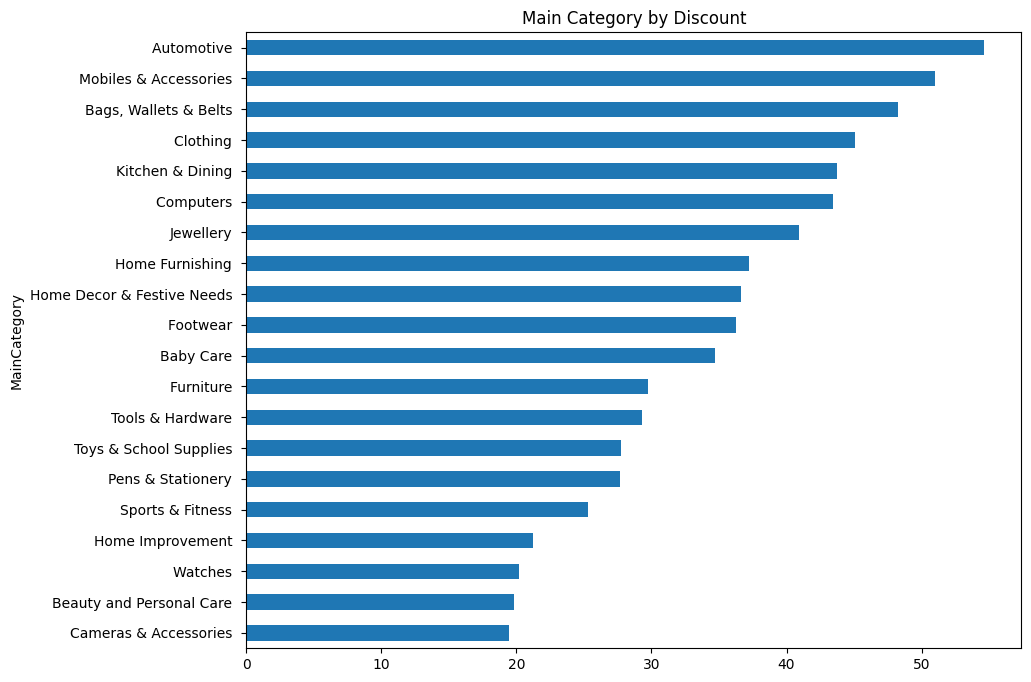

In [36]:
plt.figure(figsize=(10,8))
MainCategoryDiscount['discount%_mean'].sort_values(ascending=True).plot(kind='barh')
plt.title('Main Category by Discount')
plt.show()

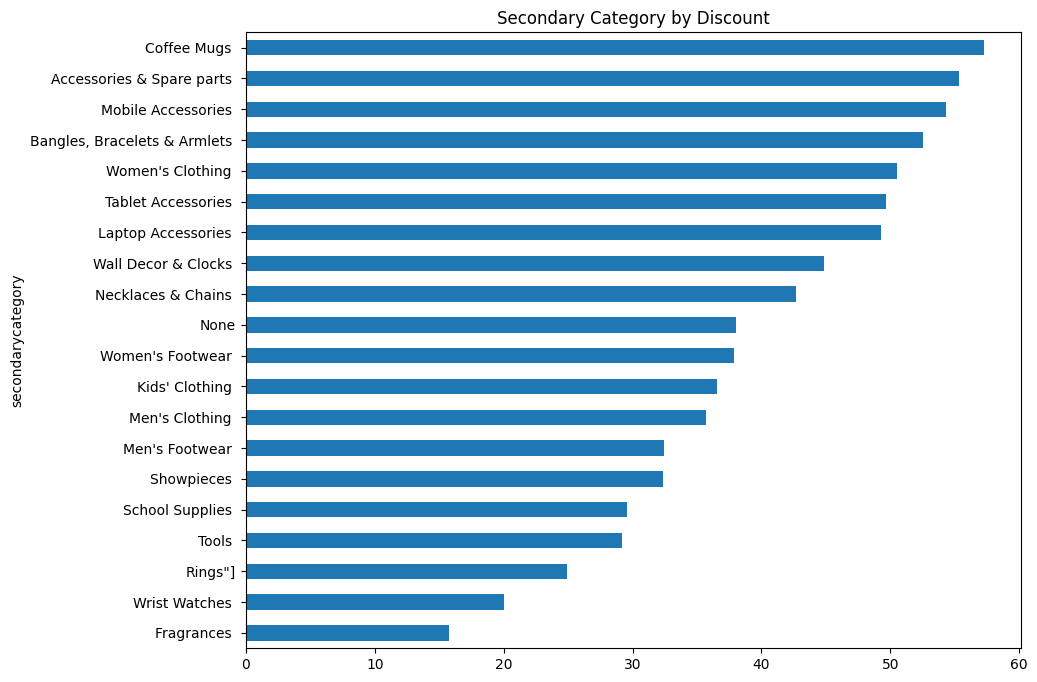

In [37]:
plt.figure(figsize=(10,8))
SecondaryCategoryDiscount['discount%_mean'].sort_values(ascending=True).plot(kind='barh')
plt.title('Secondary Category by Discount')
plt.show()

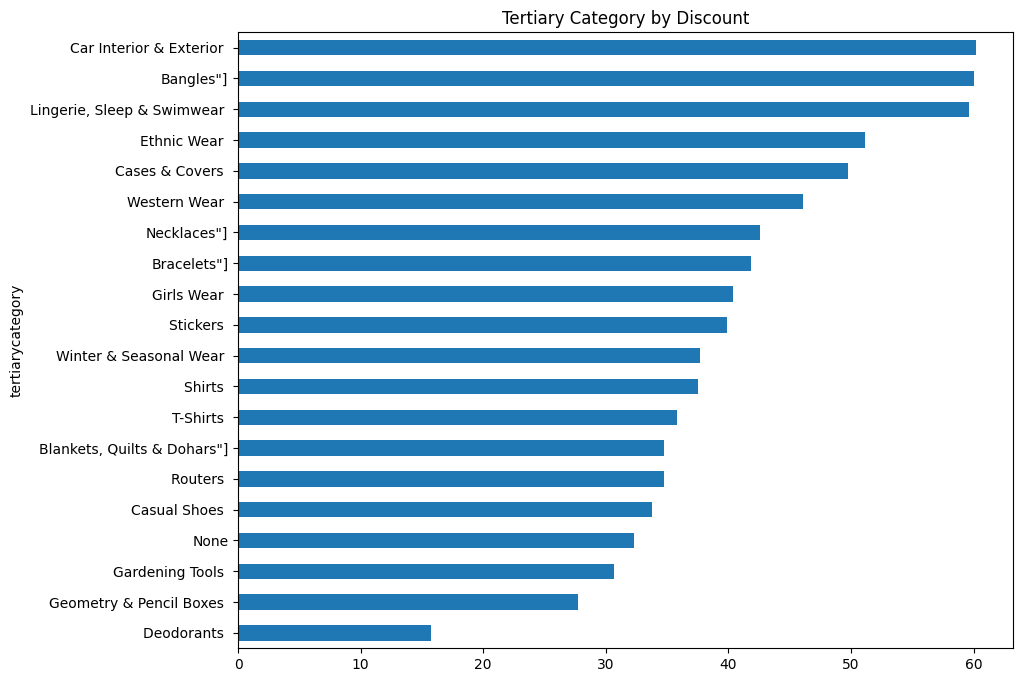

In [38]:
plt.figure(figsize=(10,8))
TertiaryCategoryDiscount['discount%_mean'].sort_values(ascending=True).plot(kind='barh')
plt.title('Tertiary Category by Discount')
plt.show()

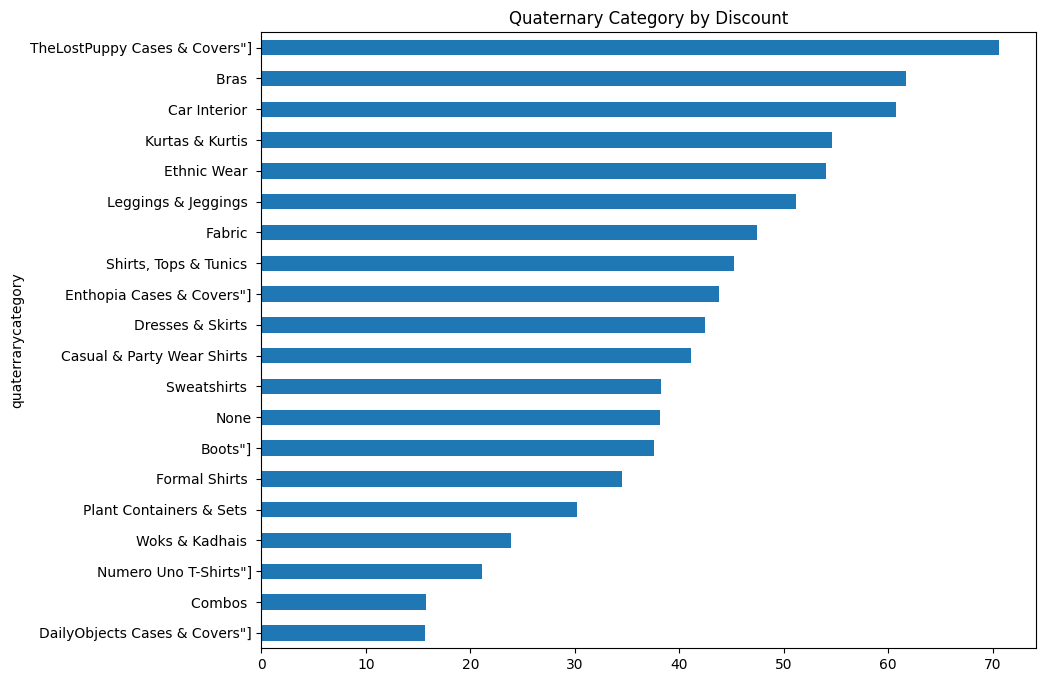

In [39]:
plt.figure(figsize=(10,8))
QuaternaryCategoryDiscount['discount%_mean'].sort_values(ascending=True).plot(kind='barh')
plt.title('Quaternary Category by Discount')
plt.show()